# Classifying Amazon Reviews

## Buisness Understanding

## Data Understanding

In [1]:
### Values of the 

## Data Preparation

### Importing Packages

In [48]:
# Data Manage 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Working with dictionaries
import collections
import operator

# Text cleaning
import re
import math
import nltk 
from nltk.corpus import stopwords
import string
from nltk import word_tokenize
from nltk import FreqDist
import string
from nltk.stem import WordNetLemmatizer

# WordCloud Visualization
from wordcloud import WordCloud

# Encoders for categorical Data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Test Model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Term Features Matrix + Clustering
#from sklearn.cluster import KMeans

In [49]:
# Uncomment in case of need to download

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

### Data Extraction

##### This data set has been downloaded from the Amazon ficial web site

In [50]:
amazon_reviews_df = pd.read_table('C:/Users/fmartinezflores/Documents/Flatiron/DS-Deloitte-1003-c3/ClusteringAmazonReviews_2/ClusteringAmazonReviews/amazon_alexa.tsv')


amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [51]:
# Data frame overview. Column information, name-data type.
amazon_reviews_df.info()

# Counting missing values
amazon_reviews_df.isna().sum()

# Removing duplicate records
amazon_reviews_df = amazon_reviews_df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### Reviews Overview

In [52]:
_reviews = amazon_reviews_df['verified_reviews']

for i in range(10):
    print(_reviews[i])
    print('--------------')
  

Love my Echo!
--------------
Loved it!
--------------
Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
--------------
I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
--------------
Music
--------------
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
--------------
Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be 

### General Analysis

#### Counting Ratings

Text(0.5, 1.0, 'Raitings')

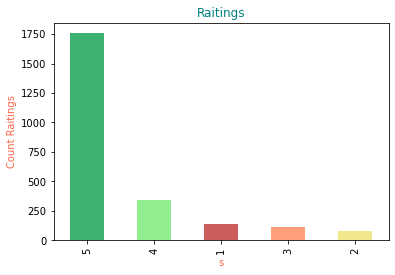

In [53]:
# Plotting
amazon_reviews_df['rating'].value_counts().plot(kind='bar', 

                                                color=['mediumseagreen','lightgreen', 'indianred', 'lightsalmon',  'khaki']);
# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Raitings', color='tomato')
plt.title('Raitings', color='teal')

#### Counting Feedback

Text(0.5, 1.0, 'Feedback')

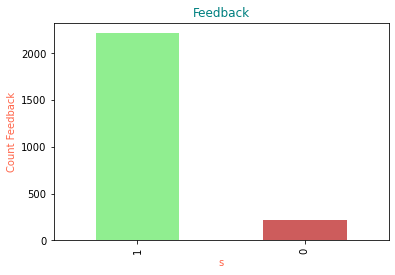

In [54]:
# TRANSFORMAR EN PIE CHART: POSITIVE AND NEGATIVE FEEDBACK
# Plotting
amazon_reviews_df['feedback'].value_counts().plot(kind='bar', color=['lightgreen', 'indianred']);

# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Feedback', color='tomato')
plt.title('Feedback', color='teal')

In [55]:
# En general la mayoria de las reseñas son pósitivas

### Ratings By Date

In [56]:
# Changing string date to Date
amazon_reviews_df['date'] = pd.to_datetime(amazon_reviews_df['date'])

Text(0.5, 1.0, 'Ratings By Date')

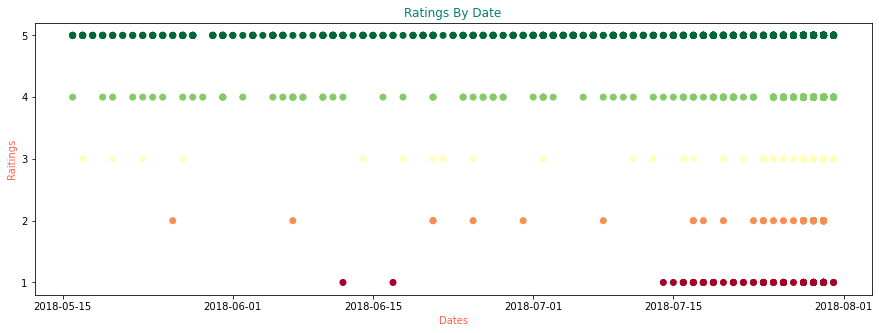

In [57]:
# Visualizing data
dates = amazon_reviews_df['date'].sort_values()
ratings = amazon_reviews_df['rating']

# Graph attributes
plt.figure(figsize=(15,5))
plt.yticks([1, 2, 3, 4, 5])
plt.scatter(dates, ratings, 
         c = ratings,
         cmap = 'RdYlGn')

plt.xlabel('Dates', color='tomato')
plt.ylabel('Raitings', color='tomato')
plt.title('Ratings By Date', color='teal')

In [58]:
# x de cada y reseñas son malas cada día?mes?3 días

In [59]:
# Aumentó el número de personas que hacen reviews y aumentaron las reseñas negativas

### Analysing Reviews

'\nTop 5 variations with most feedback:\n 1. Fire TV Stick\n 2. Black Plus\n 3. Black \n 4. Black Show\n 5. Black Dot\n'

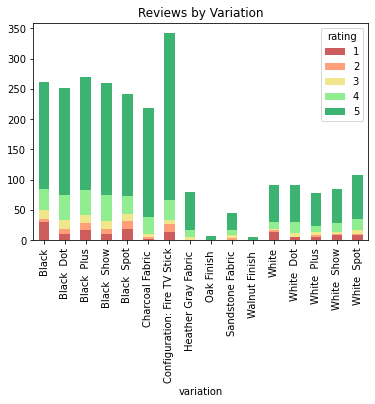

In [60]:
# Reviews by variation

# Visualizing data
amazon_reviews_df.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

"""
Top 5 variations with most feedback:
 1. Fire TV Stick
 2. Black Plus
 3. Black 
 4. Black Show
 5. Black Dot
"""

'\n- The feedback medians are between the 10 -45\n'

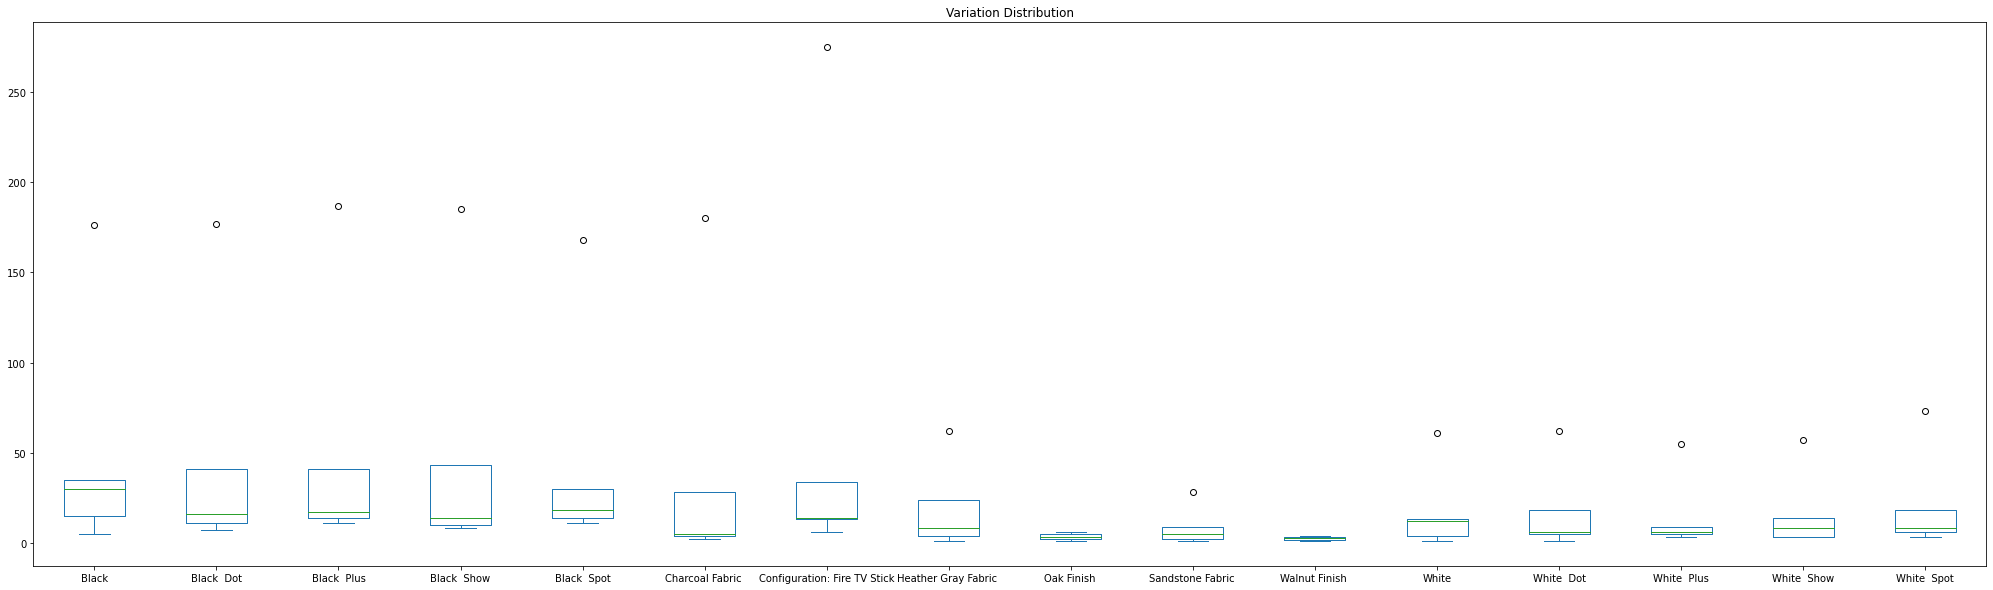

In [61]:
# Graph attributes

amazon_reviews_df.groupby(['rating', 'variation']).size().unstack().plot(kind='box', figsize=(35,10), 
                                                                         title = 'Variation Distribution') # SIZE (X,Y)

#amazon_reviews_df.boxplot(column='rating')
# BOXPLOT PARA UNA SOLO EMPRESA O LAS EMPRESAS MAS INTERESANTES

"""
- The feedback medians are between the 10 -45
"""    
# What are those outliers? What do they mean?

### Analysis by Periods of time

In [62]:
"""
Each period takes 2 weeks, have 5 periods:

Period 1: 2018-05-15 - 2018-06-01
Period 2: 2018-06-01 - 2018-06-15
Period 3: 2018-06-15 - 2018-07-01
Period 4: 2018-07-01 - 2018-07-15
Period 5: 2018-07-15 - 2018-08-01
"""

period_01 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-05-15') & (amazon_reviews_df['date'] < '2018-06-01')]
period_02 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-01') & (amazon_reviews_df['date'] < '2018-06-15')]
period_03 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-15') & (amazon_reviews_df['date'] < '2018-07-01')]
period_04 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-07-01') & (amazon_reviews_df['date'] < '2018-07-15')]
period_05 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-07-15') & (amazon_reviews_df['date'] < '2018-08-01')]

<AxesSubplot:title={'center':'Period 01 Reviews by Variation'}, xlabel='variation'>

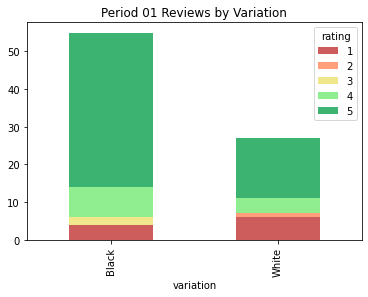

In [63]:
# Visualizing Period 01
period_01.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 01 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 02 Reviews by Variation'}, xlabel='variation'>

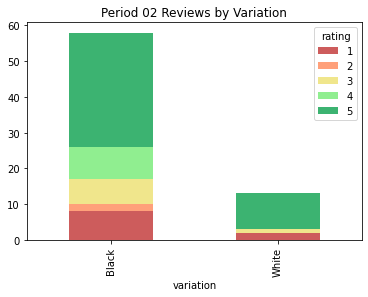

In [64]:
# Visualizing Period 02
period_02.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 02 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 03 Reviews by Variation'}, xlabel='variation'>

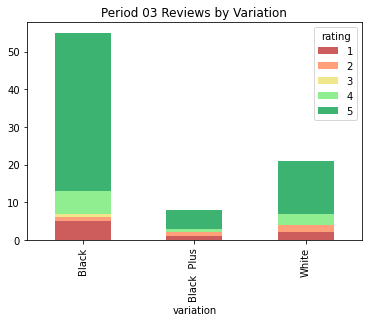

In [65]:
# Visualizing Period 03
period_03.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 03 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 04 Reviews by Variation'}, xlabel='variation'>

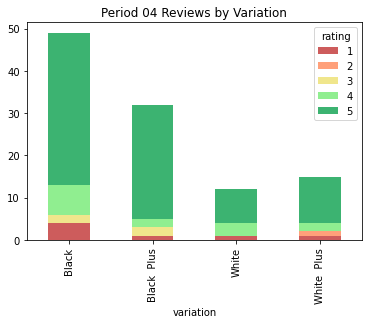

In [66]:
# Visualizing Period 04
period_04.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 04 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 05 Reviews by Variation'}, xlabel='variation'>

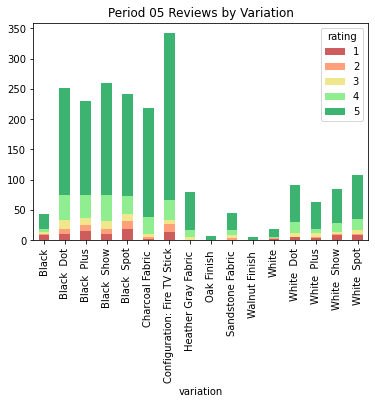

In [67]:
# Visualizing Period 05
period_05.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 05 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

# There has been more reviews in the last period, es comprensible que haya un gran aumento de revs tanto positivas como negativas
# pues las variciones aumentaron de 4 a 16 en el último periodo, esto es X4

## Text Analysis

#### Cleaning and Preprocessing 


In [68]:
"""
1. Create Corpus
2. Create Bag of words from corpus
3. Cleaning: removing punctuation, and lowercasing everything
4. Create Tokens
5. Apply NLP methods such as Stemming and Lemmatization
6. Delete Stop Words

For model:

- what is best? .. tfidf, count vector or binary count (1 or 0 if word apears in a review)? 
"""

'\n1. Create Corpus\n2. Create Bag of words from corpus\n3. Cleaning: removing punctuation, and lowercasing everything\n4. Create Tokens\n5. Apply NLP methods such as Stemming and Lemmatization\n6. Delete Stop Words\n\nFor model:\n\n- what is best? .. tfidf, count vector or binary count (1 or 0 if word apears in a review)? \n'

In [69]:
# Function that cleans one review at a time by calling the next function 
# it returns the set of tokens in the review
def clean_review(review):
        return joining_tokens(review.strip(),s_w)

# Function that joins all the cleaned words (tokens) to use them in a review
def joining_tokens(word, stop_words):
    token = cleaning_token(word, stop_words)
    tokens_from_review = " ".join(token)
    return tokens_from_review    

#  Getting rid of stop words and also removing short or long words. 
# This function cleans one token at a time .
def cleaning_token(raw_token, stop_words):
    raw_token = raw_token.lower() #([a-zA-Z]+(?:'[a-z]+)?)
    raw_tokens = re.findall('[a-záéíóúüñ]+', raw_token)# Making sure synopsis words dont have a-záéíóúüñ 
    clean_tokens = [w for w in raw_tokens if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] # Keeping only words ->
    return clean_tokens 

s_w = stopwords.words('english')
s_w += list(string.punctuation)
# More words that we can ignore to refine our vocabulary 
s_w.extend(['echo','alexa','amazon','dot','purchased','one', 'two','zzzzzzz','zzzz', 'device', 'thing'])

In [70]:
# Creating new column with the cleaned reviews
amazon_reviews_df['cleaned_reviews'] = amazon_reviews_df['verified_reviews'].apply(lambda r: clean_review(r))
amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,love
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,loved
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun old learns dinosaurs control lights pl...
4,5,2018-07-31,Charcoal Fabric,Music,1,music


### Normalizing Words

In [71]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)



In [72]:
# Creating new column with the cleaned reviews
amazon_reviews_df['cleaned_reviews'] = amazon_reviews_df['cleaned_reviews'].apply(lambda r: lemmatize_words(r))
amazon_reviews_df.head(5)

,rating,date,variation,verified_reviews,feedback,cleaned_reviews
0,5,2018-07-31,Charcoal Fabric,Love my Echo!,1,love
1,5,2018-07-31,Charcoal Fabric,Loved it!,1,love
2,4,2018-07-31,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes play game answer question correctly ...
3,5,2018-07-31,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun old learn dinosaurs control light play...
4,5,2018-07-31,Charcoal Fabric,Music,1,music


#### Frequency Distributions

In [73]:
def frequency_distributions(reviews, s_w):
    bag_of_words = []    # Vocabulary joins all synopsis words with matching Genre and Decade 
    for rev in reviews :
        token = cleaning_token(rev.strip(),s_w) # striping word from synopsis, this will clean a word at a time
        bag_of_words.extend(token)
    return dict(collections.Counter(bag_of_words))

word_count = frequency_distributions(_reviews, s_w)

# Sorting the words in ascending order according to their number of repetitions, this way we find the most popular words
sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)

#len(sorted_repetitions) # type: list, 3758
print("Top 25 Most Popular Words")
top_25 = sorted_word_count[:25]
top_25

Top 25 Most Popular Words


[('love', 746),
 ('great', 565),
 ('like', 387),
 ('use', 372),
 ('music', 369),
 ('works', 311),
 ('easy', 270),
 ('sound', 240),
 ('set', 231),
 ('good', 216),
 ('product', 207),
 ('get', 196),
 ('would', 185),
 ('home', 168),
 ('bought', 164),
 ('time', 156),
 ('speaker', 154),
 ('new', 152),
 ('still', 150),
 ('show', 149),
 ('really', 147),
 ('smart', 143),
 ('much', 142),
 ('also', 139),
 ('play', 138)]

### Word cloud

#### Positive Words

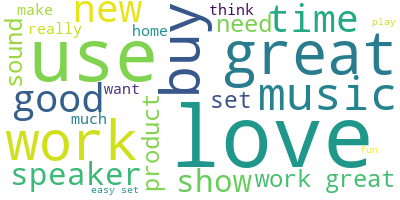

In [74]:
# Positive Words
positive_revs = amazon_reviews_df['cleaned_reviews'].loc[amazon_reviews_df['feedback'] == 1]
# Need to have all words in a string to create a Word Cloud
all_positive_words = ','.join(list(positive_revs)) 

# Create a WordCloud object
wordcloud_01 = WordCloud(background_color="white", max_words=25, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud_01.generate(all_positive_words)

# Visualize the word cloud
wordcloud_01.to_image()

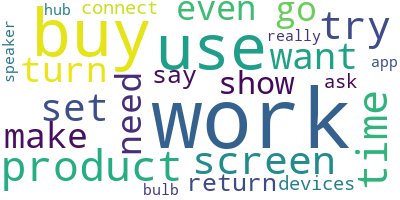

In [75]:
# Negative Words
negative_revs = amazon_reviews_df['cleaned_reviews'].loc[amazon_reviews_df['feedback'] == 0]
all_negative_words = ','.join(list(negative_revs)) 

# Create a WordCloud object
wordcloud_00 = WordCloud(background_color="white", max_words=25, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud_00.generate(all_negative_words)

# Visualize the word cloud
wordcloud_00.to_image()

### N-Grams for Positive Reviews

#### Bi-gram for positive reviews

In [104]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = positive_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(min_df = 18 , ngram_range = (2, 2))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing 
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)



C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,2205,2206,2207,2208,2209,2210,2211,2212,2213,Total
work great,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,132
easy set,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,99
play music,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,90
easy use,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,71
prime day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,66
great product,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,64
sound quality,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,56
still learn,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,51
work well,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
listen music,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,48


#### Bi-gram for negative reviews

In [107]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = negative_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(ngram_range = (2, 2))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing 
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,Total
things try,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
stop work,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
work fine,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
send back,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
play music,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7
buy refurbish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
sound quality,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,6
buy another,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
half time,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5
get work,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
"""
We can observe that in both positive and negative reviews people talk about similar topics like: 
music, sound quality
"""

#### Tri-grams for positive reviews

In [110]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = positive_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(min_df = 3, ngram_range = (3, 3))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing 
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,2205,2206,2207,2208,2209,2210,2211,2212,2213,Total
easy set use,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15
love fire stick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
love love love,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
buy prime day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
still learn use,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
super easy set,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
love play music,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
get prime day,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
great sound quality,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
work like new,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


#### Tri-grams for negative reviews

In [112]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = negative_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(ngram_range = (3, 3))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing 
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,212,213,214,215,216,217,218,219,220,Total
turn things try,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
things try screen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
want buy another,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
waste time money,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
never buy anything,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
reason give star,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
buy another hub,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
customer service help,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
digital photo screen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
get act together,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## Modeling

#### Mean of words in reviews

In [32]:
amazon_reviews_df['count_words'] = amazon_reviews_df['cleaned_reviews'].str.split().str.len()
print('Averange number of words in reviews: ',amazon_reviews_df['count_words'].mean())

Averange number of words in reviews:  11.855441478439426


### Creating Model

In [33]:
"""
CONSIDER: 
 1) What's the best feature? The split is based on the best feature.
 2) Which is the best algorithm, entropy or ginni index?
 3) Best sizes for training and test sets.
 4) Best encoder. One hot encoder, vector count, binary count, TF-IDF?
 5) Max depth
 6) Pruning in case it's necesary
 7) Accuracy, scores and interpretation of Confusion Matrix. 
 
"""

"\nCONSIDER: \n 1) What's the best feature? The split is based on the best feature.\n 2) Which is the best algorithm, entropy or ginni index?\n 3) Best sizes for training and test sets.\n 4) Best encoder. One hot encoder, vector count, binary count, TF-IDF?\n 5) Max depth\n 6) Pruning in case it's necesary\n 7) Accuracy, scores and interpretation of Confusion Matrix. \n \n"

### Model 1

#### Using TF-IDF

In [34]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(amazon_reviews_df['cleaned_reviews'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

#### Creating training and test sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train 

<1704x3002 sparse matrix of type '<class 'numpy.float64'>'
	with 18337 stored elements in Compressed Sparse Row format>

In [36]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf_01 = DecisionTreeClassifier(criterion='entropy', max_depth= 10)

clf_01.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

#### Observing Predictions

In [37]:
# Predictions
prediction_01 = clf_01.predict(X_test)
#prediction_01

In [38]:
accuracy_score(y_test, prediction_01)

0.905608755129959

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


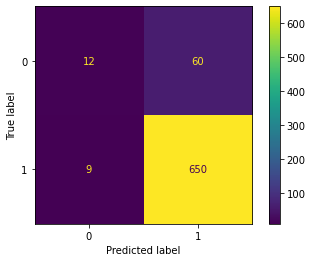

In [39]:
# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

# When class is 0 it gets it right 12 times, when class is 1 it gets it right 649 times

In [40]:
print(classification_report(y_test, prediction_01, target_names = ['positive_feedback','negative_feedback']))

                   precision    recall  f1-score   support

positive_feedback       0.57      0.17      0.26        72
negative_feedback       0.92      0.99      0.95       659

         accuracy                           0.91       731
        macro avg       0.74      0.58      0.60       731
     weighted avg       0.88      0.91      0.88       731



#### Ploting Model

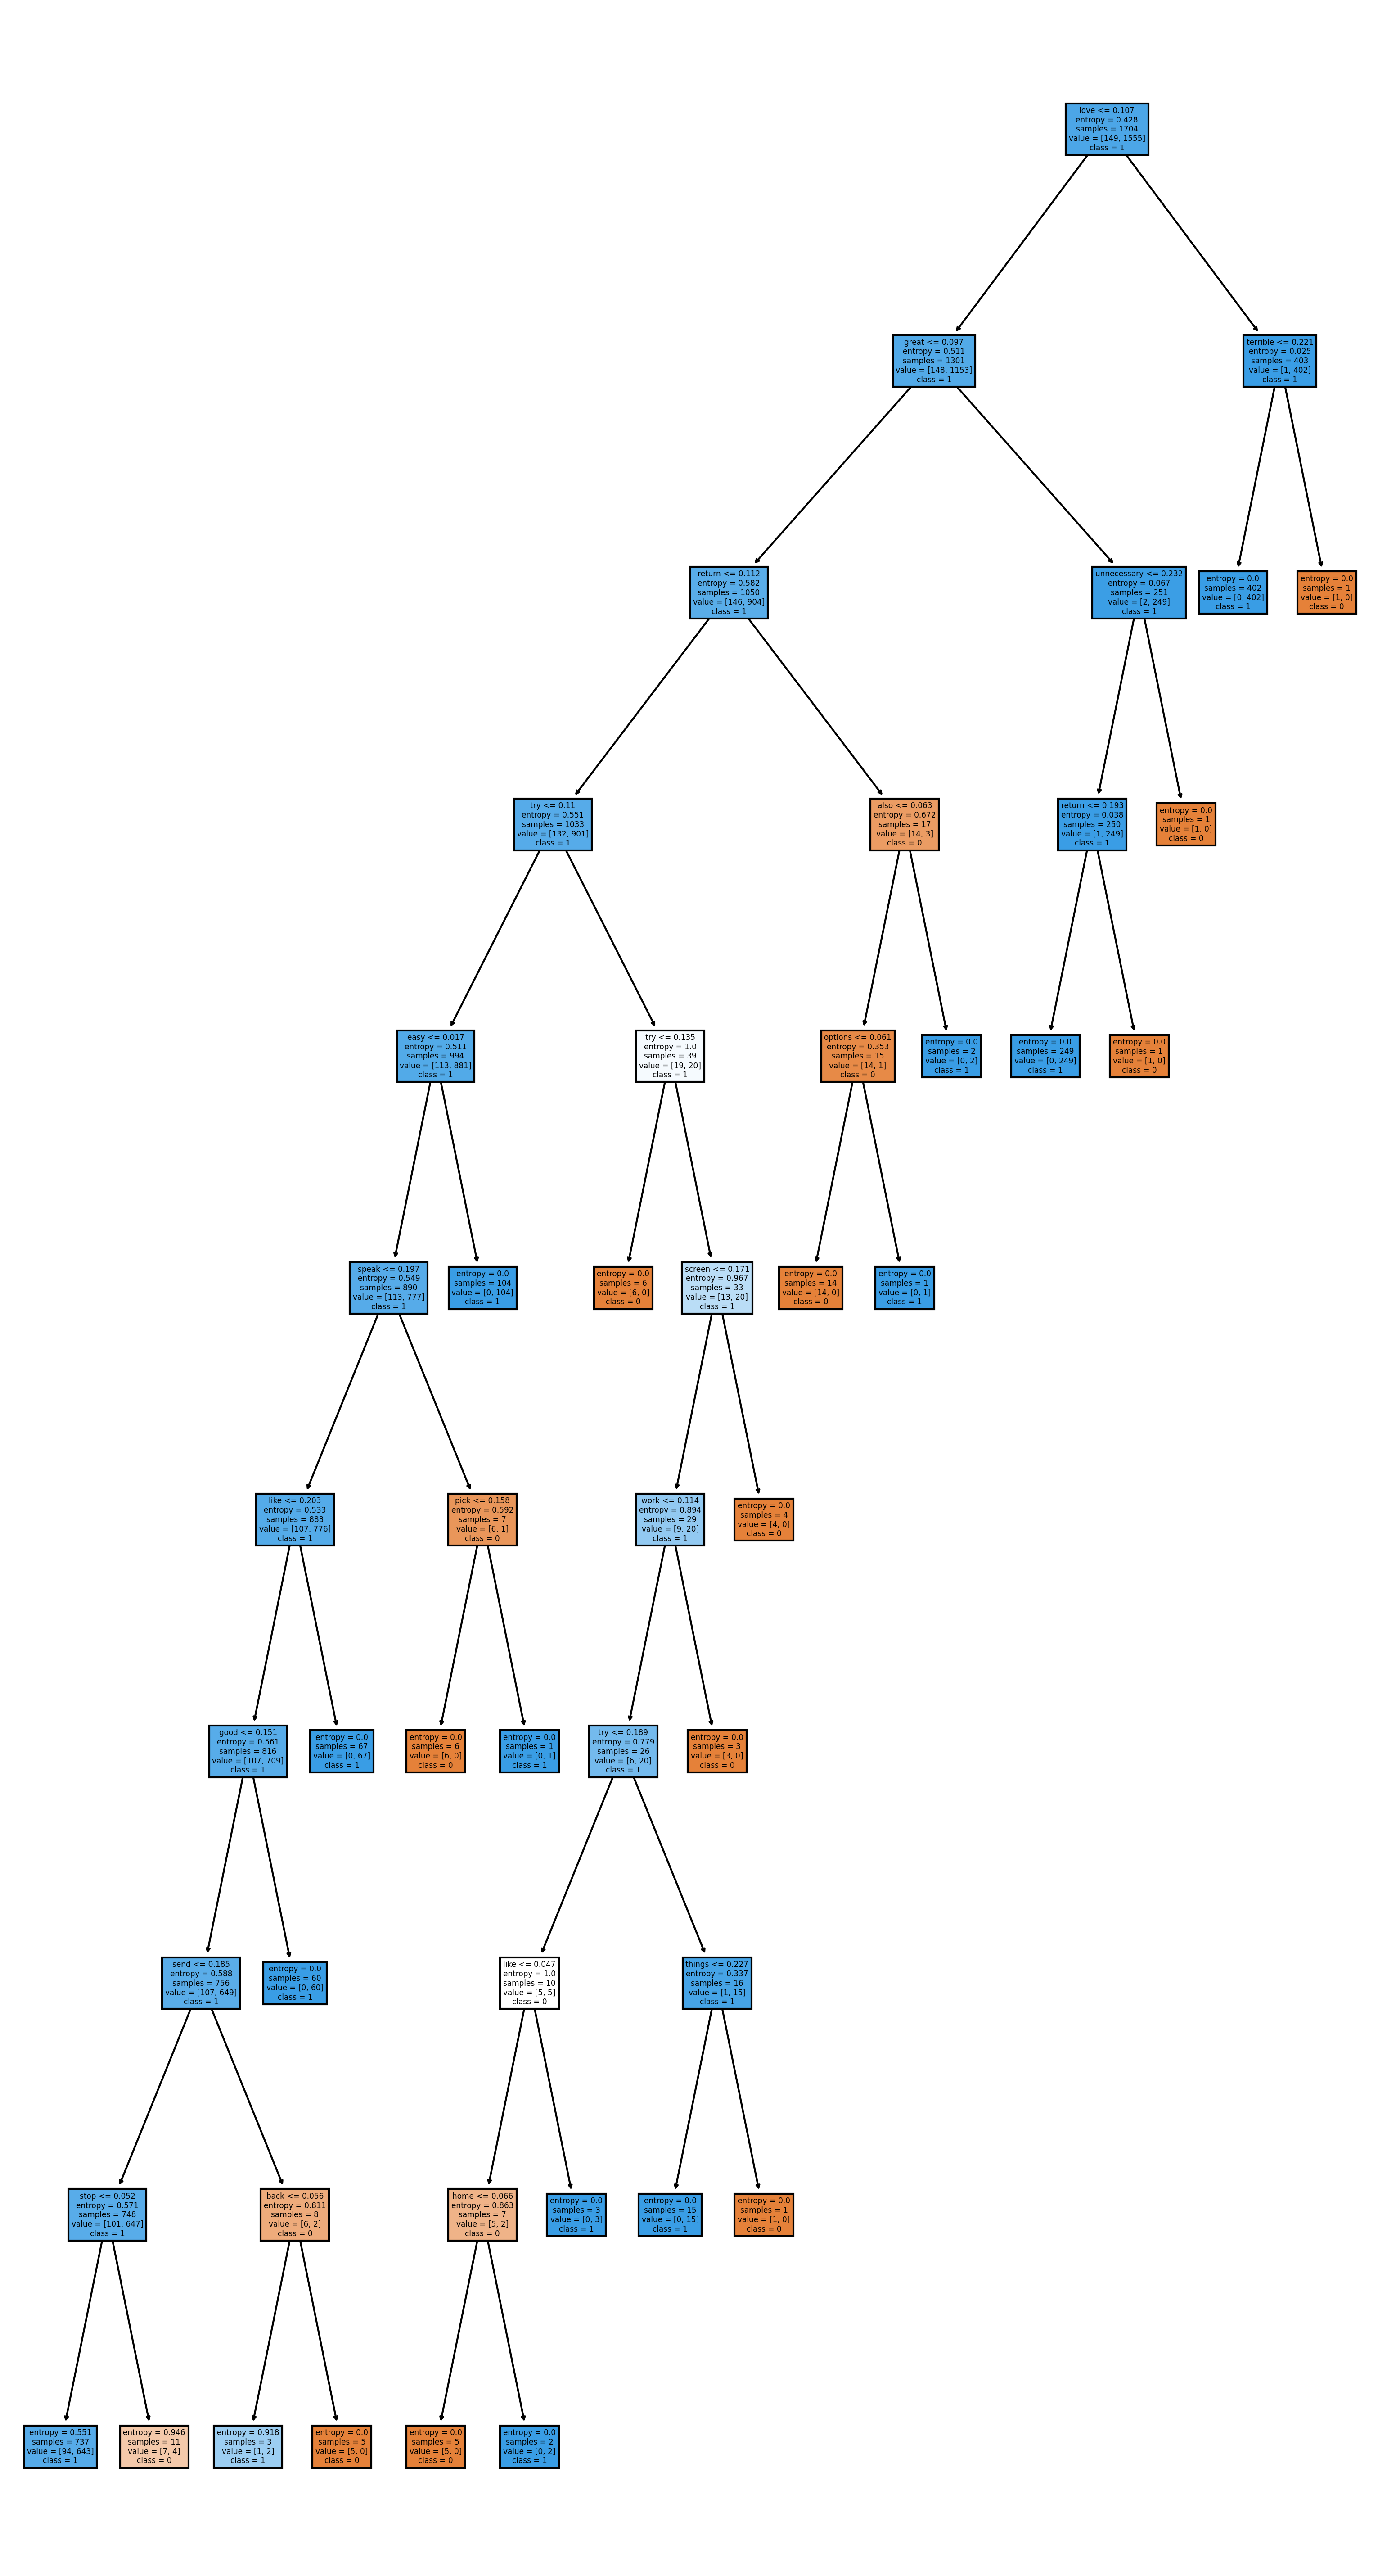

In [41]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf_01,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

### Model 2

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


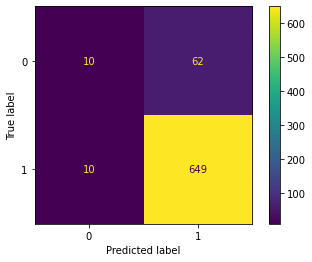

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


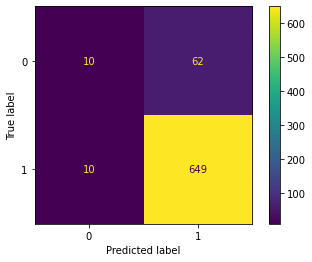

                   precision    recall  f1-score   support

positive_feedback       0.50      0.14      0.22        72
negative_feedback       0.91      0.98      0.95       659

         accuracy                           0.90       731
        macro avg       0.71      0.56      0.58       731
     weighted avg       0.87      0.90      0.88       731



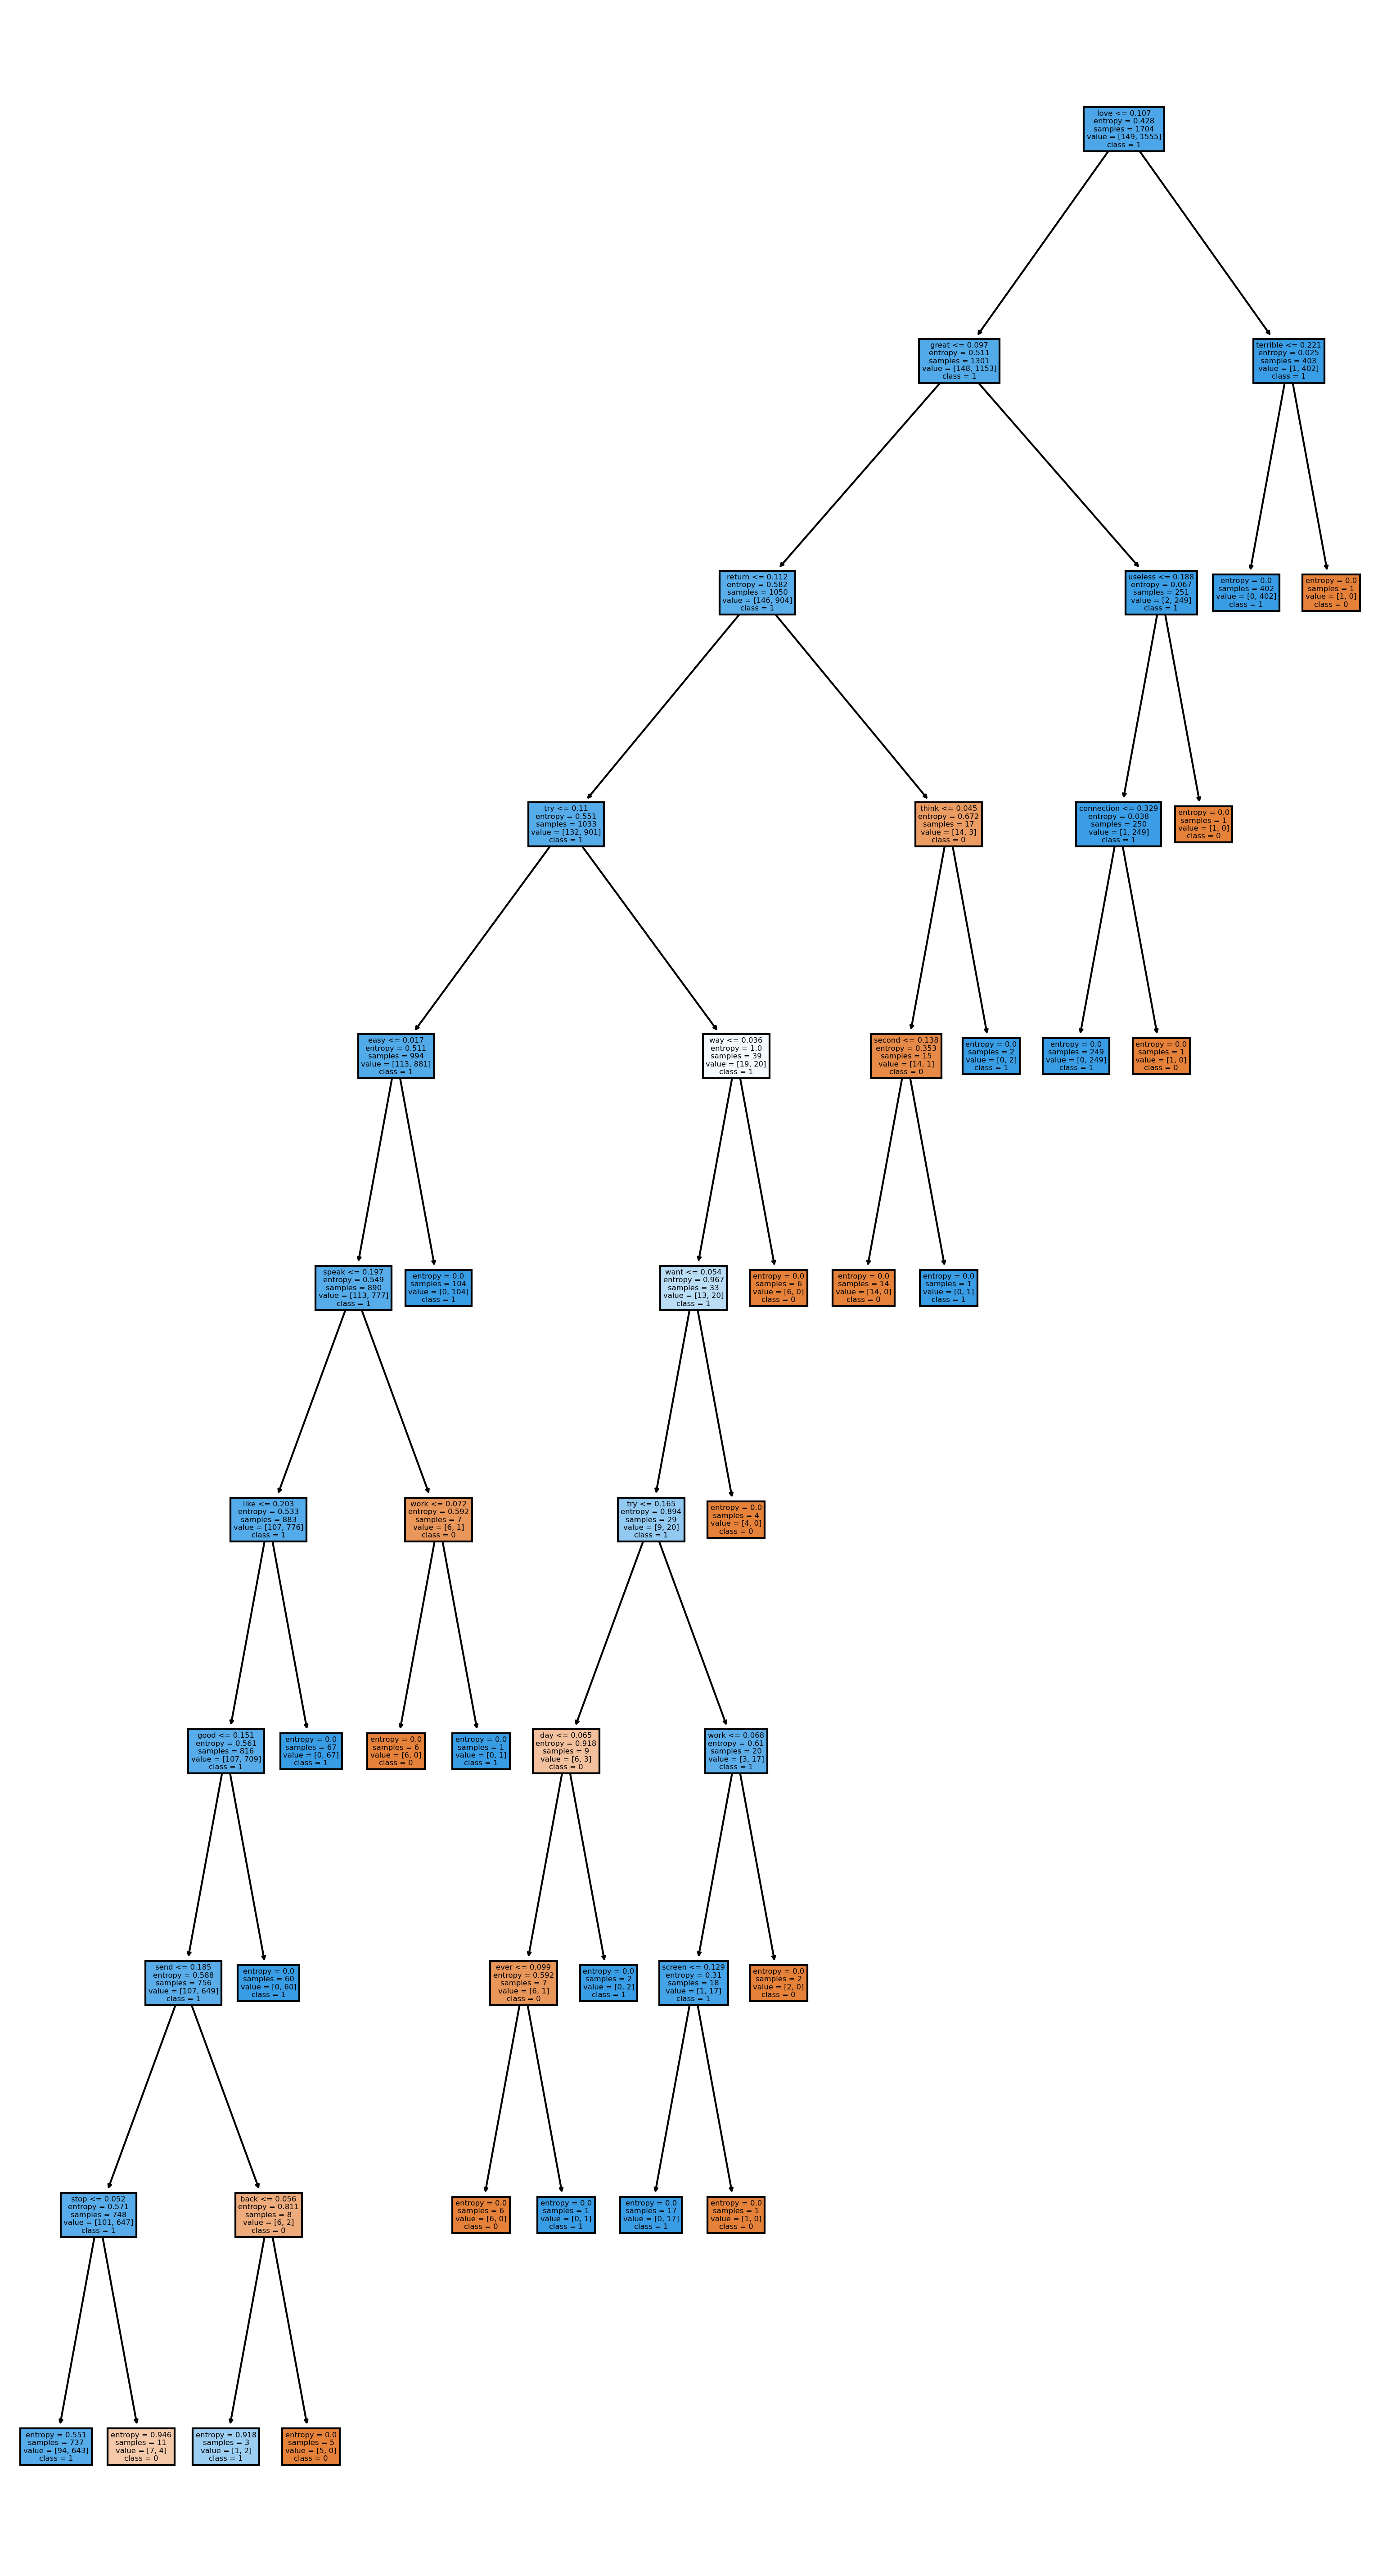

In [42]:
"""
CHANGE:

    vectorizer
    size of test and train
    classifier criterion
"""
# Initialize the vectorizer
vectorizer_02 = TfidfVectorizer()

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer_02.fit_transform(amazon_reviews_df['cleaned_reviews'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train 

# Create the classifier, fit it on the training data and make predictions on the test set
clf_01 = DecisionTreeClassifier(criterion='entropy', max_depth= 10)

clf_01.fit(X_train, y_train)

# Predictions
prediction_01 = clf_01.predict(X_test)
#prediction_01

# Calculating Acuraccy 
accuracy_score(y_test, prediction_01)

# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

# When class is 0 it gets it right 12 times, when class is 1 it gets it right 649 times

# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

print(classification_report(y_test, prediction_01, target_names = ['positive_feedback','negative_feedback']))

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf_01,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

## Evaluation

## Conclusion

In [43]:
""" 
CAN I PREDICT THE TOPIC OF THE PROBLEM A USER HAD WITH ITS ALEXA ?

EN BASE A LAS PALABRAS MÁS POPULARES ENCONTRAR UNA RELACIÓN ENTRE ESA PALABRA Y QUE SEA UNA REVIEW NEGATIVA O POSITIVA
"""

' \nCAN I PREDICT THE TOPIC OF THE PROBLEM A USER HAD WITH ITS ALEXA ?\n\nEN BASE A LAS PALABRAS MÁS POPULARES ENCONTRAR UNA RELACIÓN ENTRE ESA PALABRA Y QUE SEA UNA REVIEW NEGATIVA O POSITIVA\n'

In [44]:
"""
YA TIENES EL CÓDIGO PARA TODO AHORA SÓLO:
    1) ENCONTRAR PATRONES Y DATOS INTERESANTES
    2) PROBAR EN MODELOS CON OTROS PARAMETROS -> 4 MODELOS ALMENOS
    3) RELACIONAR DE ALGUNA MANERA LOS PATRONES CON EL MODELO
    4) SAVAR CONCLUSIONES
    5) AÑADIR TODO A LA PRESENTACIÓN
    
    ...
    
    6) RECORTAR ARBOL
    7) PROBAR OTROS ALGORITMOS
    8)  CAMBIAR COLORES DE LAS GRÁFICAS ACORDE A COLORES DELOITTE
    
    
    
# Saving words from positive and negative words
# Positive words
positive_words = np.array(positive_revs)

# Negative words
negative_words = np.array(negative_revs)

# All words
all_words = np.array(list(word_count.keys()))

# Saving feedback as array
feedback = np.array(amazon_reviews_df['feedback'])
___________________________________________________
Normalized Word Frequency
total_word_count = len(sorted_word_count)
​
​
print(f'{"Token     | ":10} Normalized Frequency')
print('________________________________________')
for word in top_25:
    normalized_frequency = word[1] / total_word_count
    print(f'{word[0]:10} {normalized_frequency:^20.4}')
# Saving in a list all words from positive reviews
positive_word_count = frequency_distributions(positive_revs, s_w)
positive_words = np.array(positive_word_count.keys())
​
# Saving in a list all words from negative reviews
negative_word_count = frequency_distributions(negative_revs, s_w)
negative_words = list(negative_word_count.keys())
​
feedback = list(amazon_reviews_df['feedback'])

#df_bigrams.columns.values
#df_bigrams.index.values

"""

'\nYA TIENES EL CÓDIGO PARA TODO AHORA SÓLO:\n    1) ENCONTRAR PATRONES Y DATOS INTERESANTES\n    2) PROBAR EN MODELOS CON OTROS PARAMETROS -> 4 MODELOS ALMENOS\n    3) RELACIONAR DE ALGUNA MANERA LOS PATRONES CON EL MODELO\n    4) SAVAR CONCLUSIONES\n    5) AÑADIR TODO A LA PRESENTACIÓN\n    \n    ...\n    \n    6) RECORTAR ARBOL\n    7) PROBAR OTROS ALGORITMOS\n    8)  CAMBIAR COLORES DE LAS GRÁFICAS ACORDE A COLORES DELOITTE\n    \n    \n    \n# Saving words from positive and negative words\n# Positive words\npositive_words = np.array(positive_revs)\n\n# Negative words\nnegative_words = np.array(negative_revs)\n\n# All words\nall_words = np.array(list(word_count.keys()))\n\n# Saving feedback as array\nfeedback = np.array(amazon_reviews_df[\'feedback\'])\n___________________________________________________\nNormalized Word Frequency\ntotal_word_count = len(sorted_word_count)\n\u200b\n\u200b\nprint(f\'{"Token     | ":10} Normalized Frequency\')\nprint(\'_______________________________